# Find K as a function of stride/overlap

In [ ]:
import os
import logging
from pathlib import Path
import lbm_caiman_python as lcp

import matplotlib.pyplot as plt
import fastplotlib as fpl
import pandas as pd
import numpy as np
import tifffile

WGPU: enumerate_adapters() is deprecated, use enumerate_adapters_sync() instead.
WGPU: request_adapter() is deprecated, use request_adapter_sync() instead.


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01,\x00\x00\x007\x08\x06\x00\x00\x00\xb6\x1bw\x99\x…

Valid,Device,Type,Backend,Driver
✅ (default),NVIDIA RTX A4000,DiscreteGPU,Vulkan,560.94
✅,NVIDIA RTX A4000,DiscreteGPU,D3D12,
❗ limited,Microsoft Basic Render Driver,CPU,D3D12,
✅,NVIDIA RTX A4000,DiscreteGPU,D3D12,
❌,NVIDIA RTX A4000/PCIe/SSE2,Unknown,OpenGL,4.6.0 NVIDIA 560.94


In [14]:
in_file = [x for x in Path('E://datasets/relaxed_resolution/zplanes/').glob("plane_10.tiff")]
str(in_file[0])

'E:\\datasets\\relaxed_resolution\\zplanes\\plane_10.tiff'

In [15]:
metadata = lcp.get_metadata(in_file[0])
metadata

{'image_height': 3704,
 'image_width': 145,
 'num_pages': 34860,
 'ndim': 3,
 'dtype': 'uint16',
 'size': 18722608800,
 'shape': [34860, 3704, 145],
 'num_planes': 30,
 'num_rois': 5,
 'num_frames': 1162.0,
 'frame_rate': 6.4464,
 'fov': [400, 2000],
 'pixel_resolution': [2.78, 2.78],
 'roi_width_px': 144,
 'roi_height_px': 720,
 'sample_format': 'int16',
 'num_lines_between_scanfields': 24,
 'center_xy': [-5.079365079, 0],
 'line_period': 4.15886e-05,
 'size_xy': [2.53968254, 12.6984127],
 'objective_resolution': 157.5}

In [16]:
movie = tifffile.memmap(in_file[0])
movie.shape

(3486, 720, 720)

In [5]:
import caiman as cm

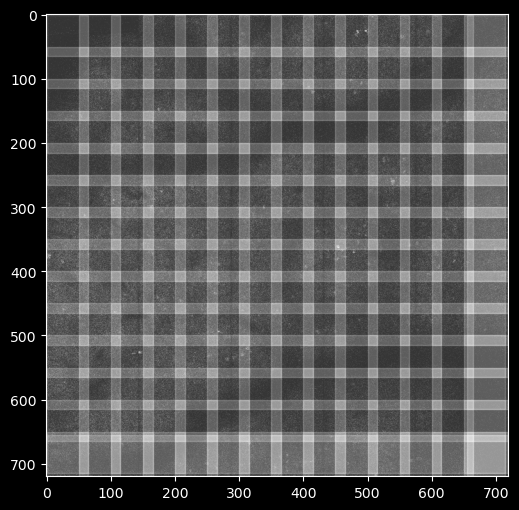

In [6]:
from caiman.utils.visualization import view_quilt
q = view_quilt(movie[0, ...], 50, 15)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def get_single_patch_coords(dims, stride, overlap, patch_index):
    """
    Get coordinates of a single patch based on stride, overlap, and patch index.
    """
    patch_height = stride + overlap
    patch_width = stride + overlap
    rows = np.arange(0, dims[0] - patch_height + 1, stride)
    cols = np.arange(0, dims[1] - patch_width + 1, stride)

    row_idx, col_idx = patch_index
    y_start = rows[row_idx]
    x_start = cols[col_idx]

    return y_start, y_start + patch_height, x_start, x_start + patch_width

def play_patch_movie(movie, pixel_resolution, stride, overlap, patch_index, fps=10):
    """
    Play a single patch of a movie as an animation in Jupyter notebook.

    Args:
        movie: ndarray
            Movie data of shape (T, y, x) where T is time and y, x are spatial dimensions.
        pixel_resolution: float
            Pixel resolution in units of px/um.
        stride: int
            Stride between patches in pixels.
        overlap: int
            Overlap between patches in pixels.
        patch_index: tuple
            Index of the patch to view (row_idx, col_idx).
        fps: int
            Frames per second for the animation, default 10.
    """
    dims = movie.shape[1:]  # Spatial dimensions (y, x)
    y_start, y_end, x_start, x_end = get_single_patch_coords(dims, stride, overlap, patch_index)

    # Extract the patch from the movie
    patch_movie = movie[:, y_start:y_end, x_start:x_end]

    # Create figure for animation
    fig, ax = plt.subplots()
    img = ax.imshow(patch_movie[0], cmap='gray',
                    extent=(x_start / pixel_resolution,
                            x_end / pixel_resolution,
                            y_end / pixel_resolution,
                            y_start / pixel_resolution))
    ax.set_title("Playing Movie")
    ax.set_xlabel("X (um)")
    ax.set_ylabel("Y (um)")
    fig.colorbar(img, ax=ax, label="Intensity")

    # Animation function to update frames
    def update(frame):
        img.set_array(patch_movie[frame])
        ax.set_title(f"Time: {frame}")
        return [img]

    # Create animation
    ani = FuncAnimation(fig, update, frames=patch_movie.shape[0], interval=1000 // fps, blit=True)

    # Display animation in Jupyter notebook
    from IPython.display import HTML
    return HTML(ani.to_jshtml())


In [17]:
stride = 50
overlap = 10

dims = movie.shape[1:]  # Spatial dimensions (y, x)
y_start, y_end, x_start, x_end = get_single_patch_coords(dims, stride, overlap, patch_index=(2, 3))
movie_patch_1 = movie[:, y_start:y_end, x_start:x_end]
y_start, y_end, x_start, x_end = get_single_patch_coords(dims, stride, overlap, patch_index=(2, 4))
movie_patch_2 = movie[:, y_start:y_end, x_start:x_end]

## Side by side movies 2 patches

RFBOutputContext()

JupyterRenderCanvas(css_height='300.0px', css_width='500.0px')
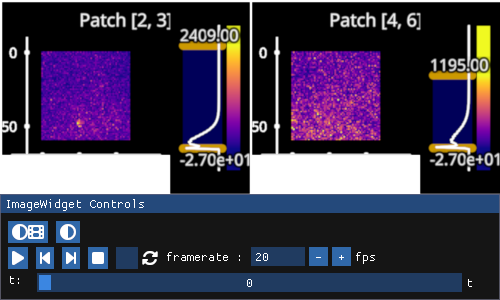

In [18]:
iw = fpl.ImageWidget(data=[movie_patch_1, movie_patch_2], names=["Patch [2, 3]", "Patch [4, 6]"])
iw.show()

In [ ]:
iw.close()

The maximum projection gives you the max pixel values through the timeseries

RFBOutputContext()

JupyterRenderCanvas(css_height='300.0px', css_width='500.0px')
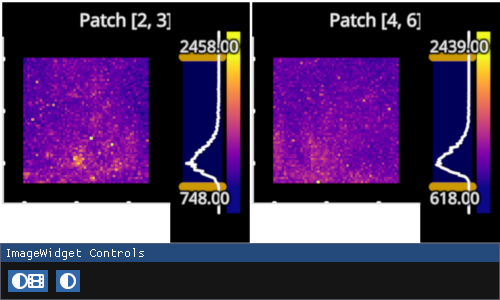

In [19]:
max_fig = movie_patch.max(axis=0)

iw = fpl.ImageWidget(data=[movie_patch_1.max(axis=0), movie_patch_2.max(axis=0)], names=["Patch [2, 3]", "Patch [4, 6]"])
iw.show()